In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\niks9\OneDrive\Desktop\DATA ANALYSIS\uber-raw-data-aug14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [5]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [6]:
df['Date/Time'].head()

0   2014-08-01 00:03:00
1   2014-08-01 00:09:00
2   2014-08-01 00:12:00
3   2014-08-01 00:12:00
4   2014-08-01 00:12:00
Name: Date/Time, dtype: datetime64[ns]

In [82]:
df['Date/Time'].dt.date

0         2014-08-01
1         2014-08-01
2         2014-08-01
3         2014-08-01
4         2014-08-01
             ...    
829270    2014-08-31
829271    2014-08-31
829272    2014-08-31
829273    2014-08-31
829274    2014-08-31
Name: Date/Time, Length: 829275, dtype: object

In [89]:
# Group by date and count the number of pickups
pickup=df.groupby(df['Date/Time'].dt.date).count()
pickup

,Date/Time,Lat,Lon,Base,hour
Date/Time,,,,,
2014-08-01,32353,32353,32353,32353,32353
2014-08-02,28678,28678,28678,28678,28678
2014-08-03,23146,23146,23146,23146,23146
2014-08-04,24952,24952,24952,24952,24952
2014-08-05,28094,28094,28094,28094,28094
2014-08-06,30495,30495,30495,30495,30495
2014-08-07,32759,32759,32759,32759,32759
2014-08-08,30411,30411,30411,30411,30411
2014-08-09,26286,26286,26286,26286,26286


In [92]:
# Find the date with the highest number of picku
highest=pickup.sort_values(by='Lat',ascending=False)
#highest
highest.index[0]
print("highest pickups happened on",highest.index[0])

highest pickups happened on 2014-08-07


In [99]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
pickup_highest_date=df[df['Date/Time'].dt.date == highest.index[0]]
pickup_highest_date.head()

,Date/Time,Lat,Lon,Base,hour
6944,2014-08-07 00:03:00,40.7455,-73.9895,B02512,0
6945,2014-08-07 00:09:00,40.7499,-74.0025,B02512,0
6946,2014-08-07 00:10:00,40.7417,-74.0037,B02512,0
6947,2014-08-07 00:16:00,40.6416,-73.7879,B02512,0
6948,2014-08-07 00:16:00,40.7008,-73.9405,B02512,0


In [103]:
# Get the count of pickups on the highest date
print("No of pickups on the highest date is:",pickup_highest_date.shape[0])

No of pickups on the highest date is: 32759


In [35]:
# Count the number of unique TLC base companies
unique_companies=df['Base'].nunique()
print("the number of unique TLC base companies is",unique_companies)

the number of unique TLC base companies is 5


In [122]:
# Group by TLC base company and count the number of pickups
df.groupby('Base')[['Lat','Lon']].count


print(df['Base'].value_counts())



B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64


In [123]:
# Find the TLC base company with the highest number of pickups
df['Base'].value_counts().index[0]


'B02617'

In [127]:
# Extract the hour from the 'Date/Time' column
df['hour']=df['Date/Time'].dt.hour
df['hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64

In [129]:
# Group by hour and count the number of pickups
print(df.groupby('hour').count())

#print(df['hour'].value_counts())

      Date/Time    Lat    Lon   Base
hour                                
0         21451  21451  21451  21451
1         14471  14471  14471  14471
2         10105  10105  10105  10105
3         10376  10376  10376  10376
4         11774  11774  11774  11774
5         16525  16525  16525  16525
6         24907  24907  24907  24907
7         34064  34064  34064  34064
8         34566  34566  34566  34566
9         30195  30195  30195  30195
10        30706  30706  30706  30706
11        31778  31778  31778  31778
12        32106  32106  32106  32106
13        35764  35764  35764  35764
14        40644  40644  40644  40644
15        48197  48197  48197  48197
16        53481  53481  53481  53481
17        57122  57122  57122  57122
18        55390  55390  55390  55390
19        53008  53008  53008  53008
20        51674  51674  51674  51674
21        51354  51354  51354  51354
22        46008  46008  46008  46008
23        33609  33609  33609  33609


In [66]:
import matplotlib.pyplot as plt

In [68]:
# Group by date and count the number of pickups
a=df['Date/Time'].dt.date.value_counts()
print(a)

2014-08-07    32759
2014-08-01    32353
2014-08-21    32304
2014-08-06    30495
2014-08-14    30457
2014-08-08    30411
2014-08-13    29788
2014-08-12    29646
2014-08-22    29512
2014-08-15    28974
2014-08-02    28678
2014-08-28    28597
2014-08-05    28094
2014-08-20    27955
2014-08-29    27424
2014-08-23    27097
2014-08-27    27018
2014-08-09    26286
2014-08-16    26234
2014-08-04    24952
2014-08-19    24834
2014-08-26    24550
2014-08-30    23930
2014-08-31    23271
2014-08-03    23146
2014-08-11    22632
2014-08-25    22093
2014-08-24    22036
2014-08-18    21956
2014-08-17    21209
2014-08-10    20584
Name: Date/Time, dtype: int64


<Axes: >

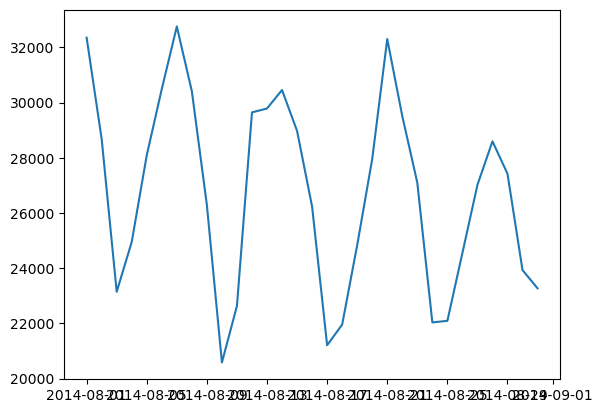

In [70]:
# Create a line plot to visualize the number of pickups over time
a.plot(kind='line')

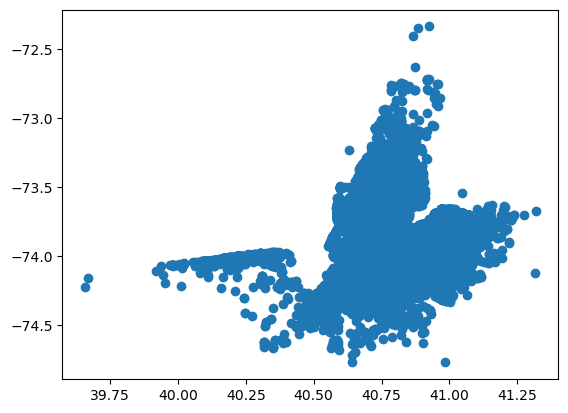

In [72]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lat'],df['Lon'])

<Axes: >

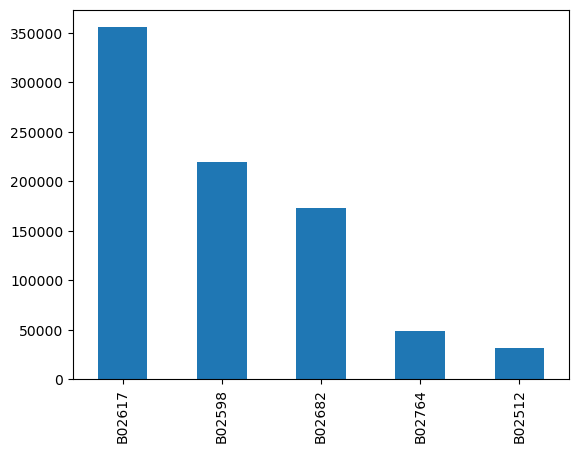

In [74]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
b=df['Base'].value_counts()
b.plot(kind="bar")

In [76]:
# Group by day of the week and count the number of pickups
c=df['Date/Time'].dt.day_name().value_counts()
c

Friday       148674
Saturday     132225
Thursday     124117
Wednesday    115256
Sunday       110246
Tuesday      107124
Monday        91633
Name: Date/Time, dtype: int64

([<matplotlib.patches.Wedge at 0x1cdca773d90>,
 [Text(0.9300880383460428, 0.5873127283871944, 'Friday'),
  Text(-0.06220598831434326, 1.0982396892381172, 'Saturday'),
  Text(-0.9417221986788412, 0.5684710199433999, 'Thursday'),
  Text(-1.028033223372264, -0.3913408893060284, 'Wednesday'),
  Text(-0.3800603265473332, -1.0322568227842985, 'Sunday'),
  Text(0.49885579314323897, -0.9803789561426899, 'Tuesday'),
  Text(1.0343849695943852, -0.3742295213865723, 'Monday')])

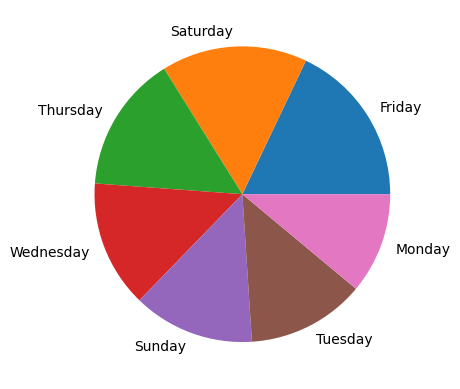

In [79]:
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(c.values,labels=c.index)
